<a href="https://colab.research.google.com/github/mausoleo/rede_neural_convolucinal/blob/main/FiltroDesmatamento_Antes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image, ImageFilter

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carregar imagem
imagem = cv2.imread('/content/Imagens/imagem cotia.jpg')

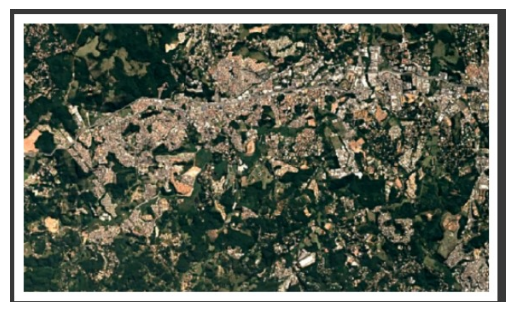

In [ ]:
# Exibir imagem
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)  # Converta para RGB
hsv = cv2.cvtColor(imagem_rgb, cv2.COLOR_RGB2HSV)

In [ ]:
# Definir os limites para a cor verde em HSV
lower_green = np.array([35, 60, 0])  # Limite inferior para verde
upper_green = np.array([85, 255, 255])  # Limite superior para verde

In [ ]:
# Criação da máscara para a cor verde
mascara_verde = cv2.inRange(hsv, lower_green, upper_green)

In [ ]:
# Definir limites para a detecção de casas (exemplo simplificado)
# Ajuste conforme necessário para sua imagem
lower_house = np.array([0, 0, 0])  # Limite inferior para cores escuras
upper_house = np.array([180, 50, 50])  # Limite superior para cores escuras

In [ ]:
# Criar a máscara para a cor das casas
mascara_casas = cv2.inRange(hsv, lower_house, upper_house)

In [ ]:
# Expandir a máscara verde e de casas
kernel = np.ones((5,5),np.uint8)
mascara_verde = cv2.dilate(mascara_verde, kernel, iterations=1)
mascara_verde = cv2.erode(mascara_verde, kernel, iterations=1)

In [ ]:
# Definição da cor verde (em RGB)
nova_cor = [0, 255, 0]

In [ ]:
# Criação da nova imagem com a cor substituída
nova_imagem = np.full_like(imagem_rgb, nova_cor)

In [ ]:
# Remover áreas das casas da máscara verde
mascara_final = cv2.bitwise_and(mascara_verde, cv2.bitwise_not(mascara_casas))

In [ ]:
result = np.where(mascara_final[:, :, None].astype(bool), nova_imagem, imagem_rgb)

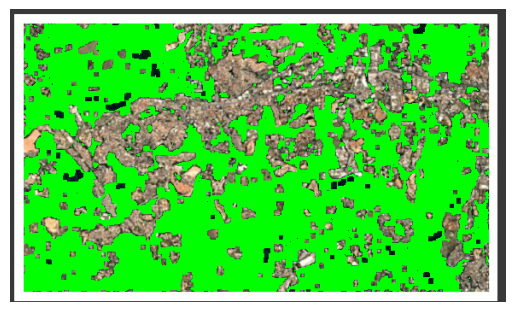

In [ ]:
# Exibir imagem
plt.imshow(result)
plt.axis('off')
plt.show()